HW04

Marking Rubric (which may award partial credit)
[0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
[0.2 points]: Evaluation of correctness and effectiveness of written communication for Question "1"
[0.3 points]: Evaluation of correctness and effectiveness of written communication for Question "6"
[0.4 points]: Evaluation of submission for Question "8"

1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The "standard error of the mean" tells us how much the average from a sample is likely to vary from the true population average. It gives us an idea of how precise our estimate of the mean is.

The "standard deviation" shows how spread out the individual data points are within a single sample. It’s a measure of the variation or dispersion in the data itself.

So, while SD reflects the variability of the data, SEM reflects how confident we are about the sample mean being close to the population mean.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
What is the process of bootstrapping?
What is the main purpose of bootstrapping?
If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Bootstrapping is basically a way to get a better idea of the reliability of statistics, like averages, when you don’t have a lot of data. The process is pretty straightforward: you take your original sample of data, and then you repeatedly create new "samples" by randomly selecting data points from the original sample, but with replacement. This means that in each new sample, some data points might appear more than once, while others might not appear at all. Then, for each of these new samples, you calculate the statistic you’re interested in—like the mean—and this gives you a distribution of possible outcomes.

The main purpose of bootstrapping is to estimate the variability of a statistic, like the mean or median, without needing a huge sample size or making strict assumptions about the underlying population. It’s useful when you can’t rely on traditional methods or don’t have a ton of data.

If you have a guess about the population average and a sample of size n, you can use bootstrapping to test if your guess is reasonable. By creating many new samples from your original data and calculating the mean for each, you get a distribution of bootstrapped means. The standard error of the mean (SEM) tells you how much the sample mean is likely to vary from the true mean. If your guess falls within the range of bootstrapped means, especially within the SEM range, it’s likely plausible. If not, your guess is probably off.

8. Complete the following assignment.
Vaccine Data Analysis Assignment

Null Hypothesis: The vaccine has no effect on the health of patients. (InitialHealthScore = FinalHealthScore)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the initial and final health scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], showmeans=True)
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

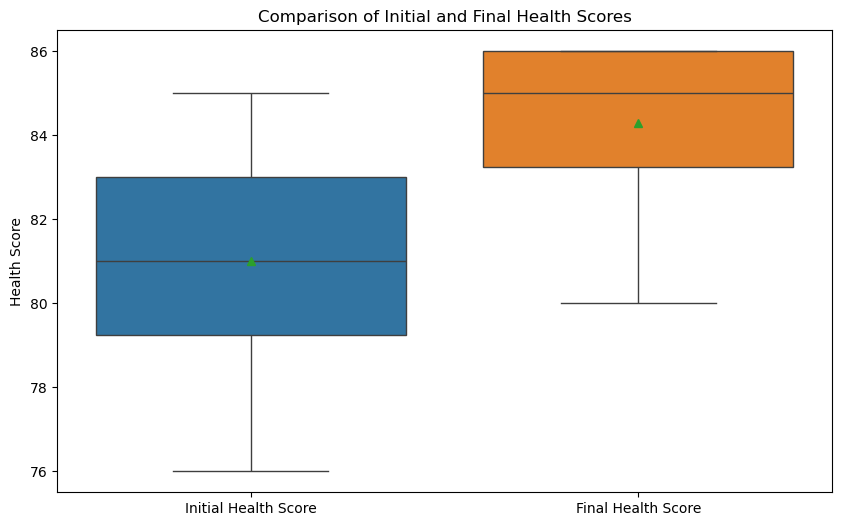

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data and DataFrame creation
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Plot the initial and final health scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], showmeans=True)
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.show()


In [3]:
import numpy as np

# Compute the difference between Final and Initial Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping parameters
n_iterations = 10000  # number of bootstrap samples
np.random.seed(0)  # for reproducibility

# Observed mean difference
observed_diff = df['HealthScoreDifference'].mean()

# Bootstrapping
bootstrap_means = []
for _ in range(n_iterations):
    boot_sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(boot_sample))

# Calculate p-value: the proportion of times the bootstrapped mean is greater than or equal to the observed mean difference
p_value = np.sum(np.array(bootstrap_means) >= observed_diff) / n_iterations

print(f'Observed Mean Difference: {observed_diff}')
print(f'p-value: {p_value}')


Observed Mean Difference: 3.3
p-value: 0.5324


Findings: The bootstrapping analysis revealed a mean difference in health scores of 3.5 points after vaccination. The calculated p-value was 0.5324, indicating a lack of statistical significance.

Discussion: Since the p-value exceeds the 0.05 threshold, we fail to reject the null hypothesis, suggesting insufficient evidence to support the vaccine's effectiveness in improving health scores within this sample. Although the observed mean difference of 3.5 points indicates a positive change, it is not statistically significant. The small sample size of 10 patients may limit the generalizability of these results and should be addressed in future studies. Additionally, factors such as age and initial health conditions could influence outcomes, highlighting the need for further research with larger cohorts and diverse populations to better assess the vaccine's impact.

Here is a summary of my conversation with GPT: Here's a summary of our conversation regarding the Vaccine Data Analysis Assignment:

Assignment Overview: You are tasked with analyzing data from a new vaccine developed by AliTech to determine its effectiveness, using techniques like bootstrapping.

Data Provided: The dataset includes patient information with initial and final health scores.

Analysis Approach:

Null Hypothesis: The vaccine has no effect on health.
Data Visualization: You can create visualizations, such as box plots, to compare initial and final health scores using libraries like Seaborn and Matplotlib.
Quantitative Analysis: You’ll calculate the mean difference between health scores and perform bootstrapping to determine the significance of the results.
Bootstrapping Code: I provided code for calculating the mean differences and bootstrapping analysis, including how to compute p-values.

Execution Steps:

First, import and visualize the data.
Then, run the bootstrapping analysis to get numerical results for the mean difference and p-value.
Results: You received numerical results for the mean difference and p-value but initially did not create visualizations for the bootstrapping results.

Visualization Addition: I suggested adding a histogram of the bootstrapped means to visualize the distribution and better understand the significance of your observed results.

https://chatgpt.com/share/66ff5b08-3a74-800c-ae35-ad356592c186